In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

CWD = pd.read_csv('/content/drive/MyDrive/Combined Data/BD_weather.csv')
print("BD_weatherdata:", CWD.shape)


BD_weatherdata: (543839, 8)


In [5]:
#
import pandas as pd
import numpy as np

# Dataset info
print("Total Rows:", CWD.shape[0])
print("Total Columns:", CWD.shape[1])

# ------------------------- Data Types Table --------------------------
data_types_table = pd.DataFrame({
    "Column": CWD.columns,
    "Data_Type": CWD.dtypes.astype(str)
})
print("\n📌 Data Types of Each Column:")
print(data_types_table)

# ---------------------- Numeric Columns Select ------------------------
numeric_columns = CWD.select_dtypes(include=['int64','float64'])
numeric_col_names = pd.DataFrame({"Numeric_Columns": numeric_columns.columns})
print("\n📌 Numeric Columns Only:")
print(numeric_col_names)

# Excluding target column if exists (like loan_status in R)
if 'loan_status' in numeric_columns.columns:
    numeric_columns_no_status = numeric_columns.drop(columns=['loan_status'])
else:
    numeric_columns_no_status = numeric_columns.copy()

# ---------------- Max & Min Value Calculation ------------------------
max_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Max Value": numeric_columns_no_status.max()
})
print("\n📌 Maximum Values:")
print(max_values_table)

min_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Min Value": numeric_columns_no_status.min()
})
print("\n📌 Minimum Values:")
print(min_values_table)

# ---------------- Mean, Median -------------------------
mean_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Mean Value": numeric_columns_no_status.mean()
})
print("\n📌 Mean Values:")
print(mean_values_table)

median_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Median Value": numeric_columns_no_status.median()
})
print("\n📌 Median Values:")
print(median_values_table)

# ---------------- Range Table -------------------------
range_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Min Value": numeric_columns_no_status.min(),
    "Max Value": numeric_columns_no_status.max()
})
print("\n📌 Range (Min-Max):")
print(range_values_table)

# ---------------- IQR Calculation ----------------------
iqr_values_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Q1 (25%)": numeric_columns_no_status.quantile(0.25),
    "Q3 (75%)": numeric_columns_no_status.quantile(0.75),
})
iqr_values_table["IQR"] = iqr_values_table["Q3 (75%)"] - iqr_values_table["Q1 (25%)"]

print("\n📌 IQR (Q1-Q3):")
print(iqr_values_table)

# ---------------- Variance & Standard Deviation ----------------------
variance_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Variance": numeric_columns_no_status.var().round(2)
})
print("\n📌 Variance:")
print(variance_table)

std_dev_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Standard Deviation": numeric_columns_no_status.std().round(2)
})
print("\n📌 Standard Deviation:")
print(std_dev_table)

# ---------------- Mode Function (Like R) ----------------------
def get_mode(series):
    mode_val = series.mode()
    return mode_val[0] if len(mode_val)>0 else "No Mode"

mode_table = pd.DataFrame({
    "Column Name": numeric_columns_no_status.columns,
    "Mode": [get_mode(CWD[col]) for col in numeric_columns_no_status.columns]
})
print("\n📌 Mode of Each Numeric Column:")
print(mode_table)


Total Rows: 543839
Total Columns: 8

📌 Data Types of Each Column:
                  Column Data_Type
Station          Station    object
Year                Year     int64
Month              Month     int64
Day                  Day     int64
Rainfall        Rainfall   float64
Sunshine        Sunshine   float64
Humidity        Humidity   float64
Temperature  Temperature   float64

📌 Numeric Columns Only:
  Numeric_Columns
0            Year
1           Month
2             Day
3        Rainfall
4        Sunshine
5        Humidity
6     Temperature

📌 Maximum Values:
             Column Name  Max Value
Year                Year     2023.0
Month              Month       12.0
Day                  Day       31.0
Rainfall        Rainfall      590.0
Sunshine        Sunshine       90.2
Humidity        Humidity      100.0
Temperature  Temperature       37.8

📌 Minimum Values:
             Column Name  Min Value
Year                Year     1961.0
Month              Month        1.0
Day             

In [6]:
import pandas as pd
import numpy as np

# ---------- COUNT TOTAL MISSING VALUES PER COLUMN ----------
def count_missing(series):
    return series.isna().sum() + (series == "").sum()

missing_values = CWD.apply(count_missing)

missing_summary = pd.DataFrame({
    "Column": missing_values.index,
    "Missing_Count": missing_values.values
})
print("\n📌 Missing Values Summary:")
print(missing_summary)

print("\n🔹 Total Missing Values in Dataset:", missing_summary["Missing_Count"].sum())

# --------------------------------------------------------------------
# REPLACE NUMERIC COLUMN MISSING VALUES USING MEDIAN (Similar to R Code)
# --------------------------------------------------------------------

# person_age update: NA / negative / decimal values → replace using median
if "person_age" in CWD.columns:
    median_age = CWD["person_age"].median(skipna=True)
    CWD["person_age"] = CWD["person_age"].apply(
        lambda x: median_age if pd.isna(x) or x < 0 or float(x)%1!=0 else x
    )

# person_income update: NA / negative → replace with median
if "person_income" in CWD.columns:
    median_income = CWD["person_income"].median(skipna=True)
    CWD["person_income"] = CWD["person_income"].apply(
        lambda x: median_income if pd.isna(x) or x < 0 else x
    )

# --------------------------------------------------------------------
# MODE FUNCTION (Loan_status, Gender, Education)
# --------------------------------------------------------------------
def get_mode(series):
    mode_val = series.mode()
    return mode_val[0] if len(mode_val)>0 else None

# loan_status missing replace using mode
if "loan_status" in CWD.columns:
    CWD["loan_status"] = CWD["loan_status"].fillna(get_mode(CWD["loan_status"]))

# person_gender empty string → NA → then fill mode
if "person_gender" in CWD.columns:
    CWD["person_gender"] = CWD["person_gender"].replace([""," "], np.nan)
    CWD["person_gender"] = CWD["person_gender"].fillna(get_mode(CWD["person_gender"]))

# person_education empty string → NA → then fill mode
if "person_education" in CWD.columns:
    CWD["person_education"] = CWD["person_education"].replace([""," "], np.nan)
    CWD["person_education"] = CWD["person_education"].fillna(get_mode(CWD["person_education"]))

# Final total missing values after cleaning
print("\n✅ Missing value handling complete!")
print("🔹 Remaining Missing Values:", CWD.isna().sum().sum())



📌 Missing Values Summary:
        Column  Missing_Count
0      Station              0
1         Year              0
2        Month              0
3          Day              0
4     Rainfall              0
5     Sunshine              0
6     Humidity              0
7  Temperature              0

🔹 Total Missing Values in Dataset: 0

✅ Missing value handling complete!
🔹 Remaining Missing Values: 0


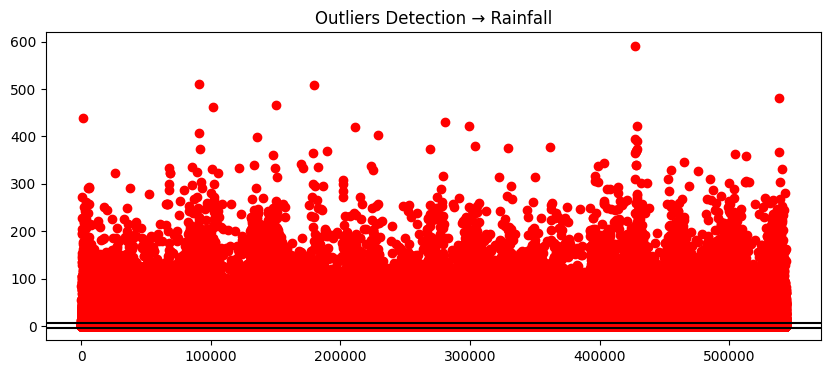


Rainfall Outliers:
            Station  Year  Month  Day  Rainfall  Sunshine  Humidity  \
26      Ambaganctg  2008      1   27      55.0       0.8      93.0   
40      Ambaganctg  2008      2   10       9.0       0.0      96.0   
80      Ambaganctg  2008      3   21      13.0       5.8      84.0   
124     Ambaganctg  2008      5    4      13.0       3.2      72.0   
126     Ambaganctg  2008      5    6      85.0       7.7      77.0   
...            ...   ...    ...  ...       ...       ...       ...   
543749      Teknaf  2023     10    3      40.0       0.0      87.0   
543766      Teknaf  2023     10   20       8.0      10.4      83.0   
543770      Teknaf  2023     10   24      43.0       0.0      89.0   
543771      Teknaf  2023     10   25      47.0       8.8      84.0   
543806      Teknaf  2023     11   29      27.0       5.4      81.0   

        Temperature  
26             16.8  
40             20.0  
80             26.7  
124            29.5  
126            28.7  
...   

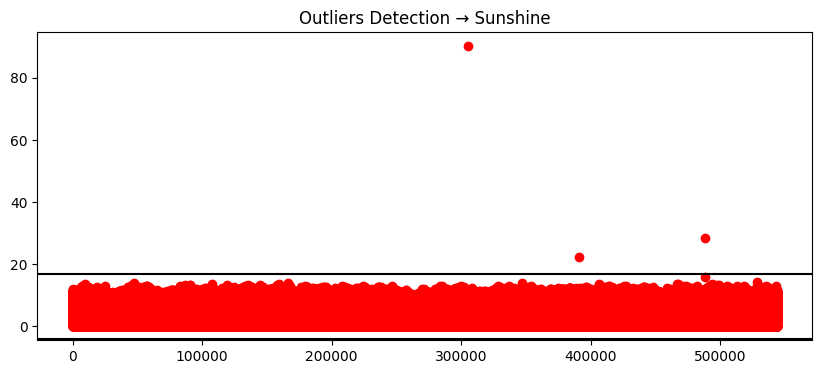


Sunshine Outliers:
          Station  Year  Month  Day  Rainfall  Sunshine  Humidity  Temperature
304889  Kutubdia  2014     10    9       0.0      90.2      82.0         30.0
390783  Rajshahi  2019     12   12       0.0      22.2      83.0         18.5
488489    Sydpur  2019      6   16       0.0      28.5      80.0         30.5


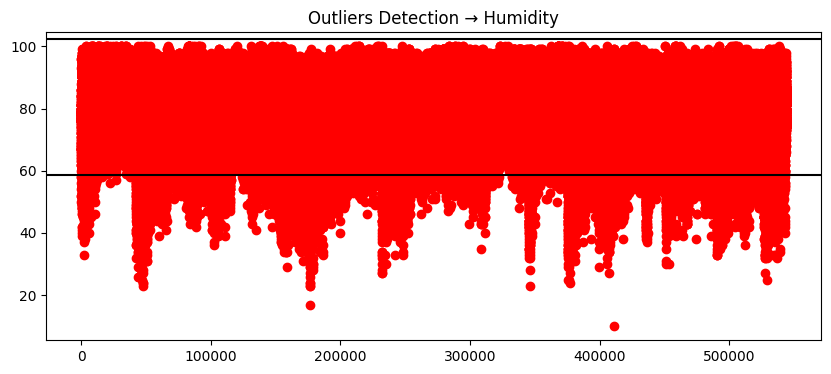


Humidity Outliers:
            Station  Year  Month  Day  Rainfall  Sunshine  Humidity  \
43      Ambaganctg  2008      2   13       0.0      10.1      56.0   
44      Ambaganctg  2008      2   14       0.0       9.9      50.0   
58      Ambaganctg  2008      2   28       0.0       9.6      52.0   
96      Ambaganctg  2008      4    6       0.0       9.9      58.0   
97      Ambaganctg  2008      4    7       0.0      10.3      58.0   
...            ...   ...    ...  ...       ...       ...       ...   
543474      Teknaf  2023      1    1       0.0       9.1      55.0   
543475      Teknaf  2023      1    2       0.0       8.5      56.0   
543532      Teknaf  2023      2   28       0.0       8.2      58.0   
543533      Teknaf  2023      3    1       0.0       9.7      54.0   
543534      Teknaf  2023      3    2       0.0       9.9      55.0   

        Temperature  
43             19.3  
44             18.9  
58             22.5  
96             28.9  
97             29.0  
...   

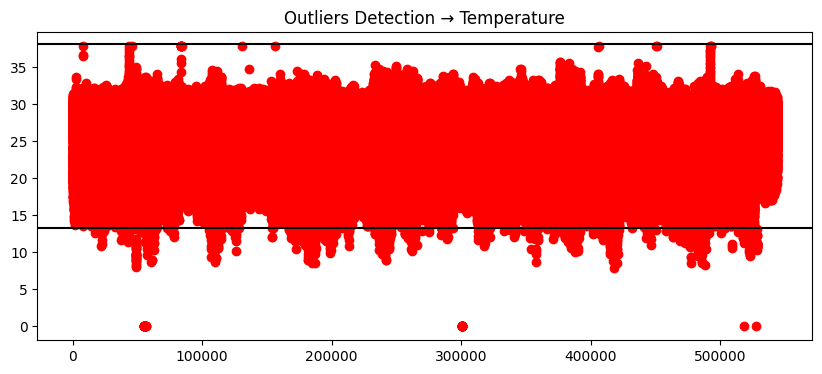


Temperature Outliers:
         Station  Year  Month  Day  Rainfall  Sunshine  Humidity  Temperature
17174   Barisal  1998      1    8       0.0       4.4      91.0        13.30
17176   Barisal  1998      1   10       0.0       3.5      94.0        12.60
17177   Barisal  1998      1   11       0.0       5.3      91.0        13.10
21925   Barisal  2011      1   11       0.0       3.1      89.0        10.90
21926   Barisal  2011      1   12       0.0       6.3      79.0        13.30
...         ...   ...    ...  ...       ...       ...       ...          ...
528129   Teknaf  1980     12   27       0.0      10.9      73.0        11.05
528130   Teknaf  1980     12   28       0.0      11.0      71.0        10.90
528131   Teknaf  1980     12   29       0.0      11.0      76.0        10.70
528132   Teknaf  1980     12   30       0.0      10.8      73.0        10.85
528133   Teknaf  1980     12   31       0.0      10.8      79.0        10.75

[1319 rows x 8 columns]

✔ Cleaned Successfully → S

In [8]:
#Handling Noisy Values (Outliers)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Outlier detect function (IQR) --- #
def detect_outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def plot_outliers(df, col):
    lower, upper = detect_outlier(df[col])

    plt.figure(figsize=(10,4))
    plt.scatter(range(len(df[col])), df[col], c="red")
    plt.axhline(lower, color="black")
    plt.axhline(upper, color="black")
    plt.title(f"Outliers Detection → {col}")
    plt.show()

    return df[(df[col] < lower) | (df[col] > upper)]

# ------------------- RAINFALL ------------------- #
rain_lower, rain_upper = detect_outlier(CWD["Rainfall"])
rain_outliers = plot_outliers(CWD,"Rainfall")
print("\nRainfall Outliers:\n", rain_outliers)

# Noisy rule → Rainfall <0 replace
median_rain = CWD.loc[CWD["Rainfall"]>=0, "Rainfall"].median()
CWD.loc[CWD["Rainfall"] < 0, "Rainfall"] = median_rain

# ------------------- SUNSHINE ------------------- #
sun_lower, sun_upper = detect_outlier(CWD["Sunshine"])
sun_outliers = plot_outliers(CWD,"Sunshine")
print("\nSunshine Outliers:\n", sun_outliers)

# Noisy rule → Sunshine must be 0–24 hrs
median_sun = CWD.loc[(CWD["Sunshine"]>=0) & (CWD["Sunshine"]<=24),"Sunshine"].median()
CWD.loc[(CWD["Sunshine"]<0)|(CWD["Sunshine"]>24),"Sunshine"] = median_sun

# ------------------- HUMIDITY ------------------- #
hum_lower, hum_upper = detect_outlier(CWD["Humidity"])
hum_outliers = plot_outliers(CWD,"Humidity")
print("\nHumidity Outliers:\n", hum_outliers)

# Noise rule → Humidity 0–100%
median_hum = CWD.loc[(CWD["Humidity"]>=0)&(CWD["Humidity"]<=100),"Humidity"].median()
CWD.loc[(CWD["Humidity"]<0)|(CWD["Humidity"]>100),"Humidity"] = median_hum

# ------------------- TEMPERATURE ------------------- #
temp_lower, temp_upper = detect_outlier(CWD["Temperature"])
temp_outliers = plot_outliers(CWD,"Temperature")
print("\nTemperature Outliers:\n", temp_outliers)

# Noise rule → Temperature < -10 or >50
median_temp = CWD.loc[(CWD["Temperature"]>=-10)&(CWD["Temperature"]<=50),"Temperature"].median()
CWD.loc[(CWD["Temperature"]<-10)|(CWD["Temperature"]>50),"Temperature"] = median_temp

# SAVE Cleaned file
CWD.to_csv("Cleaned_Weather_Noise_Removed.csv",index=False)
print("\n✔ Cleaned Successfully → Saved as Cleaned_Weather_Noise_Removed.csv")


In [11]:
import pandas as pd
import numpy as np

# -------------- CHECK INVALID VALUES --------------------
print("\n🔍 Detecting Invalid Values...\n")

invalid_report = {
    "Invalid_Rainfall"   : CWD[(CWD["Rainfall"] < 0) | (CWD["Rainfall"] > 500)].shape[0],
    "Invalid_Sunshine"   : CWD[(CWD["Sunshine"] < 0) | (CWD["Sunshine"] > 24)].shape[0],
    "Invalid_Humidity"   : CWD[(CWD["Humidity"] < 0) | (CWD["Humidity"] > 100)].shape[0],
    "Invalid_Temperature": CWD[(CWD["Temperature"] < -10) | (CWD["Temperature"] > 50)].shape[0],
    "Invalid_Month"      : CWD[(CWD["Month"] < 1)  | (CWD["Month"] > 12)].shape[0],
    "Invalid_Day"        : CWD[(CWD["Day"] < 1)    | (CWD["Day"] > 31)].shape[0],
    "Invalid_Year"       : CWD[(CWD["Year"] < 1950) | (CWD["Year"] > 2030)].shape[0]
}

invalid_df = pd.DataFrame({"Category": invalid_report.keys(), "Invalid_Count": invalid_report.values()})
print("⚠ Invalid Value Summary:\n", invalid_df)

# ---------------- FIXING INVALID VALUES ---------------------
print("\n🔧 Fixing Invalid Data...\n")

# Rainfall Fix
median_rain = CWD.loc[(CWD["Rainfall"]>=0)&(CWD["Rainfall"]<=500),"Rainfall"].median()
CWD.loc[(CWD["Rainfall"]<0)|(CWD["Rainfall"]>500),"Rainfall"] = median_rain

# Sunshine Fix
median_sun = CWD.loc[(CWD["Sunshine"]>=0)&(CWD["Sunshine"]<=24),"Sunshine"].median()
CWD.loc[(CWD["Sunshine"]<0)|(CWD["Sunshine"]>24),"Sunshine"] = median_sun

# Humidity Fix
median_hum = CWD.loc[(CWD["Humidity"]>=0)&(CWD["Humidity"]<=100),"Humidity"].median()
CWD.loc[(CWD["Humidity"]<0)|(CWD["Humidity"]>100),"Humidity"] = median_hum

# Temperature Fix
median_temp = CWD.loc[(CWD["Temperature"]>=-10)&(CWD["Temperature"]<=50),"Temperature"].median()
CWD.loc[(CWD["Temperature"]<-10)|(CWD["Temperature"]>50),"Temperature"] = median_temp

# Month/Day Fix
CWD.loc[(CWD["Month"]<1)|(CWD["Month"]>12),"Month"] = np.nan
CWD.loc[(CWD["Day"]<1)|(CWD["Day"]>31),"Day"] = np.nan

# Replace with most frequent
CWD["Month"].fillna(CWD["Month"].mode()[0], inplace=True)
CWD["Day"].fillna(CWD["Day"].mode()[0], inplace=True)

# Year Fix (Replace outside realistic range with median)
year_median = CWD[(CWD["Year"]>=1950)&(CWD["Year"]<=2030)]["Year"].median()
CWD.loc[(CWD["Year"]<1950)|(CWD["Year"]>2030),"Year"] = year_median

# ---------------- SAVE FILE ---------------------
CWD.to_csv("Weather_Invalid_Values_Handled.csv", index=False)
print("\n🎉 Task-4 Complete: Invalid values fixed & Saved → Weather_Invalid_Values_Handled.csv\n")




🔍 Detecting Invalid Values...

⚠ Invalid Value Summary:
               Category  Invalid_Count
0     Invalid_Rainfall              3
1     Invalid_Sunshine              0
2     Invalid_Humidity              0
3  Invalid_Temperature              0
4        Invalid_Month              0
5          Invalid_Day              0
6         Invalid_Year              0

🔧 Fixing Invalid Data...



/tmp/ipython-input-2439561972.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CWD["Month"].fillna(CWD["Month"].mode()[0], inplace=True)
/tmp/ipython-input-2439561972.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru


🎉 Task-4 Complete: Invalid values fixed & Saved → Weather_Invalid_Values_Handled.csv



In [14]:
# --------------------------- Task 5 ---------------------------
#   Data Type Conversion + Categorical Transformation (BD_weather)
# ---------------------------------------------------------------

import pandas as pd

# BD Weather Dataset = CWD → already loaded from previous steps

# --------- 1. FORCE PROPER DATA TYPE (Convert to numeric) ---------
CWD["Rainfall"]     = pd.to_numeric(CWD["Rainfall"], errors="coerce")
CWD["Temperature"]  = pd.to_numeric(CWD["Temperature"], errors="coerce")
CWD["Humidity"]     = pd.to_numeric(CWD["Humidity"], errors="coerce")
CWD["Sunshine"]     = pd.to_numeric(CWD["Sunshine"], errors="coerce")

print("\n✔ Datatype conversion completed.\n")
print(CWD.dtypes)


# --------- 2. CATEGORICAL TRANSFORMATION ---------

# A) Rainfall → (Rain / No Rain)
CWD["Rain_Category"] = CWD["Rainfall"].apply(lambda x: "Yes" if x > 0 else "No")

# Reposition beside Rainfall
cols = list(CWD.columns)
rain_idx = cols.index("Rainfall")
cols.remove("Rain_Category")
cols.insert(rain_idx + 1, "Rain_Category")
CWD = CWD[cols]

print("\n🌧 Rainfall Category Converted:")
print(CWD[["Rainfall","Rain_Category"]].head())


# B) Sunshine Hour Category → Low / Medium / High
CWD["Sunshine_Level"] = pd.cut(
    CWD["Sunshine"],
    bins=[0, 4, 8, 15],        # hour scale
    labels=["Low", "Medium", "High"],
    include_lowest=True
)

# Place Column beside Sunshine
cols = list(CWD.columns)
sun_idx = cols.index("Sunshine")
cols.remove("Sunshine_Level")
cols.insert(sun_idx + 1, "Sunshine_Level")
CWD = CWD[cols]

print("\n☀ Sunshine Level Mapping:")
print(CWD[["Sunshine","Sunshine_Level"]].head())


# C) Humidity Category → Comfort Levels
CWD["Humidity_Category"] = pd.cut(
    CWD["Humidity"],
    bins=[0, 30, 70, 100],
    labels=["Low", "Moderate", "High"],
    include_lowest=True
)

# Reposition beside Humidity
cols = list(CWD.columns)
hum_idx = cols.index("Humidity")
cols.remove("Humidity_Category")
cols.insert(hum_idx + 1, "Humidity_Category")
CWD = CWD[cols]

print("\n💧 Humidity Category:")
print(CWD[["Humidity","Humidity_Category"]].head())


# --------------- SAVE TRANSFORMED OUTPUT ---------------
CWD.to_csv("BD_Weather_Transformed.csv", index=False)
print("\n🎉 Task 5 Completed Successfully — File Saved as:  BD_Weather_Transformed.csv")



/tmp/ipython-input-2689501556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CWD["Rainfall"]     = pd.to_numeric(CWD["Rainfall"], errors="coerce")
/tmp/ipython-input-2689501556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CWD["Temperature"]  = pd.to_numeric(CWD["Temperature"], errors="coerce")
/tmp/ipython-input-2689501556.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i


✔ Datatype conversion completed.

Station                object
Year                    int64
Month                 float64
Day                   float64
Rainfall              float64
Sunshine              float64
Sunshine_Level       category
Humidity              float64
Temperature           float64
Rain_Category          object
Humidity_Category    category
dtype: object

🌧 Rainfall Category Converted:
   Rainfall Rain_Category
0       0.0            No
1       0.0            No
2       0.0            No
3       0.0            No
4       0.0            No

☀ Sunshine Level Mapping:
   Sunshine Sunshine_Level
0       9.1           High
1       5.6         Medium
2       8.6           High
3       9.1           High
4       9.4           High

💧 Humidity Category:
   Humidity Humidity_Category
0      78.0              High
1      79.0              High
2      82.0              High
3      73.0              High
4      67.0          Moderate

🎉 Task 5 Completed Successfully — File Sa

In [15]:
# ------------------------------ Task 6 --------------------------------
#         Normalization (Min-Max Scaling) for Weather Dataset
# ----------------------------------------------------------------------

import pandas as pd

# CWD dataset already loaded from previous task

# ---------- Function for Min-Max Normalization ----------
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize Rainfall
CWD["Rainfall_Norm"] = normalize(CWD["Rainfall"])
cols = list(CWD.columns)
cols.insert(cols.index("Rainfall") + 1, cols.pop(cols.index("Rainfall_Norm")))
CWD = CWD[cols]
print("\n🌧 Rainfall Normalized Summary:")
print(CWD["Rainfall_Norm"].describe())


# Normalize Temperature
CWD["Temperature_Norm"] = normalize(CWD["Temperature"])
cols = list(CWD.columns)
cols.insert(cols.index("Temperature") + 1, cols.pop(cols.index("Temperature_Norm")))
CWD = CWD[cols]
print("\n🌡 Temperature Normalized Summary:")
print(CWD["Temperature_Norm"].describe())


# Normalize Humidity
CWD["Humidity_Norm"] = normalize(CWD["Humidity"])
cols = list(CWD.columns)
cols.insert(cols.index("Humidity") + 1, cols.pop(cols.index("Humidity_Norm")))
CWD = CWD[cols]
print("\n💧 Humidity Normalized Summary:")
print(CWD["Humidity_Norm"].describe())


# Normalize Sunshine
CWD["Sunshine_Norm"] = normalize(CWD["Sunshine"])
cols = list(CWD.columns)
cols.insert(cols.index("Sunshine") + 1, cols.pop(cols.index("Sunshine_Norm")))
CWD = CWD[cols]
print("\n☀ Sunshine Normalized Summary:")
print(CWD["Sunshine_Norm"].describe())


# ----------- DISPLAY CHECK -------------
print("\n📌 First 10 Normalized Records")
print(CWD.head(10)[["Rainfall","Rainfall_Norm","Temperature","Temperature_Norm",
                    "Humidity","Humidity_Norm","Sunshine","Sunshine_Norm"]])

# ----------- SAVE BACKUP -------------
CWD.to_csv("BD_Weather_Normalized.csv", index=False)
print("\n🎉 Task 6 Completed → Saved as BD_Weather_Normalized.csv")



🌧 Rainfall Normalized Summary:
count    543839.000000
mean          0.013992
std           0.040180
min           0.000000
25%           0.000000
50%           0.000000
75%           0.006237
max           1.000000
Name: Rainfall_Norm, dtype: float64

🌡 Temperature Normalized Summary:
count    543839.000000
mean          0.676473
std           0.110238
min           0.000000
25%           0.597884
50%           0.711640
75%           0.761905
max           1.000000
Name: Temperature_Norm, dtype: float64

💧 Humidity Normalized Summary:
count    543839.000000
mean          0.776097
std           0.099311
min           0.000000
25%           0.722222
50%           0.788889
75%           0.844444
max           1.000000
Name: Humidity_Norm, dtype: float64

☀ Sunshine Normalized Summary:
count    543839.000000
mean          0.282856
std           0.150847
min           0.000000
25%           0.171171
50%           0.324324
75%           0.405405
max           1.000000
Name: Sunshine_Norm, d

In [16]:
# ------------------------------- Task 7 ----------------------------------
#                   Duplicate Record Detection & Removal
# -------------------------------------------------------------------------

import pandas as pd

# 1️⃣ Total number of duplicated rows
duplicate_count = CWD.duplicated().sum()
print("🔍 Number of duplicate rows found:", duplicate_count)

# 2️⃣ Display duplicate records (same row appears more than once)
if duplicate_count > 0:
    print("\n📌 Duplicate Rows Preview:")
    print(CWD[CWD.duplicated(keep=False)])
else:
    print("\n✔ No Exact Duplicate Rows Found")

# 3️⃣ Remove Duplicates like R (loan_data %>% distinct())
CWD = CWD.drop_duplicates()

print("\n✨ Dataset Updated — Duplicates Removed Successfully!")
print("Remaining Rows:", CWD.shape[0])

# 4️⃣ Sample check (Similar to R → loan_data[c(29,30), ])
print("\n🔎 Row 29-30 after duplicate handling:")
print(CWD.iloc[28:30])   # Python index starts at 0 so 29th row = 28


🔍 Number of duplicate rows found: 0

✔ No Exact Duplicate Rows Found

✨ Dataset Updated — Duplicates Removed Successfully!
Remaining Rows: 543839

🔎 Row 29-30 after duplicate handling:
       Station  Year  Month   Day  Rainfall  Rainfall_Norm Rain_Category  \
28  Ambaganctg  2008    1.0  29.0       0.0            0.0            No   
29  Ambaganctg  2008    1.0  30.0       0.0            0.0            No   

    Sunshine  Sunshine_Norm Sunshine_Level  Humidity  Humidity_Norm  \
28       9.0       0.405405           High      67.0       0.633333   
29       9.3       0.418919           High      65.0       0.611111   

   Humidity_Category  Temperature  Temperature_Norm  
28          Moderate         17.4          0.460317  
29          Moderate         19.5          0.515873  


In [17]:
# =====================  Task 8: Filtering ==========================
import pandas as pd

# ---- Thresholds (Like income_cap, exp_cap in loan_data ) ----
rain_cap       = 500     # mm
sun_cap        = 15      # hours
temp_min, temp_max = -10, 45
hum_min, hum_max   = 0, 100

# 1️⃣ Count Rows Before Filtering
rows_before = len(CWD)
print("🔹 Total Rows Before Filtering:", rows_before)

# 2️⃣ Count Violating Records (Like R viol_income/viol_exp)
viol_rain  = (CWD["Rainfall"] > rain_cap).sum()
viol_sun   = (CWD["Sunshine"] > sun_cap).sum()
viol_temp  = ((CWD["Temperature"] < temp_min) | (CWD["Temperature"] > temp_max)).sum()
viol_hum   = ((CWD["Humidity"] < hum_min) | (CWD["Humidity"] > hum_max)).sum()

print(f"\n❗ Rainfall >{rain_cap}mm             :", viol_rain)
print(f"❗ Sunshine >{sun_cap}hrs/day         :", viol_sun)
print(f"❗ Temperature not in [{temp_min},{temp_max}]:", viol_temp)
print(f"❗ Humidity not in 0–100%             :", viol_hum)

# 3️⃣ Filtering (Similar to mutate + filter + row_id in R)
CWD_filtered = (
    CWD.reset_index(drop=True)
      .assign(row_id=lambda x: x.index+1)
      .query(
          "Rainfall <= @rain_cap and "
          "Sunshine <= @sun_cap and "
          "Temperature >= @temp_min and Temperature <= @temp_max and "
          "Humidity >= @hum_min and Humidity <= @hum_max"
      )
)

# 4️⃣ After Filtering
rows_after = len(CWD_filtered)
removed = rows_before - rows_after

print("\n🔹 Rows After Filtering:", rows_after)
print("❌ Total Removed:", removed)

# 5️⃣ Before vs After Summary
print("\n======= BEFORE FILTER SUMMARY =======")
print(CWD[["Rainfall","Sunshine","Temperature","Humidity"]].describe())

print("\n======= AFTER FILTER SUMMARY ========")
print(CWD_filtered[["Rainfall","Sunshine","Temperature","Humidity"]].describe())

# Preview
print("\n📌 First 10 rows after filtering:")
print(CWD_filtered.head(10))

# Save Output File
CWD_filtered.to_csv("8_After_Filtering_Weather.csv", index=False)
print("\n📁 File Saved → 8_After_Filtering_Weather.csv")


🔹 Total Rows Before Filtering: 543839

❗ Rainfall >500mm             : 0
❗ Sunshine >15hrs/day         : 2
❗ Temperature not in [-10,45]: 0
❗ Humidity not in 0–100%             : 0

🔹 Rows After Filtering: 543837
❌ Total Removed: 2

======= BEFORE FILTER SUMMARY =======
            Rainfall       Sunshine    Temperature       Humidity
count  543839.000000  543839.000000  543839.000000  543839.000000
mean        6.730028       6.279398      25.570680      79.848704
std        19.326525       3.348796       4.166981       8.937966
min         0.000000       0.000000       0.000000      10.000000
25%         0.000000       3.800000      22.600000      75.000000
50%         0.000000       7.200000      26.900000      81.000000
75%         3.000000       9.000000      28.800000      86.000000
max       481.000000      22.200000      37.800000     100.000000

======= AFTER FILTER SUMMARY ========
            Rainfall       Sunshine    Temperature       Humidity
count  543837.000000  543837.0

In [18]:
# ================================================
# 🟩 TASK-9 : SAMPLING (TRAIN / TEST SPLIT)
# ================================================

import pandas as pd
from sklearn.model_selection import train_test_split

# Your dataset
# CWD = pd.read_csv("AfterFiltering.csv")     # if already loaded skip this

# Ensure class column exists
if "Rain_Category" not in CWD.columns:
    raise KeyError("❌ 'Rain_Category' column not found! (Check Task-5 part)")

# Convert target column to category (similar to factor in R)
CWD["Rain_Category"] = CWD["Rain_Category"].astype("category")

print("\n============= BEFORE SPLIT =============")
print("Total Rows:", len(CWD))
print("\nOverall Class Distribution:")
print(CWD["Rain_Category"].value_counts(normalize=True).round(3)*100, "%")

# ==================================================
# Train / Test Split (Stratified like R `initial_split`)
# ==================================================

train, test = train_test_split(
    CWD,
    test_size = 0.20,
    stratify = CWD["Rain_Category"],     # class balancing
    random_state = 123                   # reproducibility
)

# Show distribution
print("\n========== TRAIN SET ==========")
print(train["Rain_Category"].value_counts(normalize=True).round(3)*100, "%")

print("\n========== TEST SET ==========")
print(test["Rain_Category"].value_counts(normalize=True).round(3)*100, "%")

# Save Output
train.to_csv("Train_Split.csv", index=False)
test.to_csv("Test_Split.csv", index=False)

print("\n✔ Split Completed Successfully")
print("📁 Files Saved : Train_Split.csv & Test_Split.csv")



============= BEFORE SPLIT =============
Total Rows: 543839

Overall Class Distribution:
Rain_Category
No     67.6
Yes    32.4
Name: proportion, dtype: float64 %

========== TRAIN SET ==========
Rain_Category
No     67.6
Yes    32.4
Name: proportion, dtype: float64 %

========== TEST SET ==========
Rain_Category
No     67.6
Yes    32.4
Name: proportion, dtype: float64 %

✔ Split Completed Successfully
📁 Files Saved : Train_Split.csv & Test_Split.csv


In [19]:
# ===========================================================
# 🟩 TASK-10 : RANDOM OVERSAMPLING (TRAIN DATA ONLY)
# ===========================================================

import pandas as pd
from sklearn.utils import resample

# Train dataset load (if not loaded before)
# train = pd.read_csv("Train_Split.csv")  # If already loaded skip this

# Ensure target column exists
if "Rain_Category" not in train.columns:
    raise KeyError("❌ 'Rain_Category' not found in training dataset")

train["Rain_Category"] = train["Rain_Category"].astype("category")

# ---------------- BEFORE BALANCING -----------------
print("\n--- TRAIN: Class Distribution BEFORE Balancing ---")
before = train["Rain_Category"].value_counts()
print(before)
print("Proportion (%):\n", (before/before.sum()*100).round(2))

# Identify majority / minority
maj_class = before.idxmax()   # Larger count class
min_class = before.idxmin()   # Smaller count class

maj_count = before[maj_class]
min_count = before[min_class]

# Split into two groups
majority = train[train["Rain_Category"] == maj_class]
minority = train[train["Rain_Category"] == min_class]

# 🚀 OVERSAMPLE minority to match majority count
minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=maj_count,
    random_state=123
)

# Final Balanced Train Data
train_balanced = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=123)

# ---------------- AFTER BALANCING -----------------
print("\n--- TRAIN: Class Distribution AFTER Balancing ---")
after = train_balanced["Rain_Category"].value_counts()
print(after)
print("Proportion (%):\n", (after/after.sum()*100).round(2))

# Imbalance ratio
ratio_before = round(maj_count / min_count, 3)
ratio_after = round(after.max() / after.min(), 3)

print(f"\nImbalance Ratio BEFORE : {ratio_before} (maj/min)")
print(f"Imbalance Ratio AFTER  : {ratio_after}  (maj=min ✓)\n")

# Export Balanced Data
train_balanced.to_csv("Train_Balanced.csv", index=False)
print("📁 Balanced training dataset saved as: Train_Balanced.csv")



--- TRAIN: Class Distribution BEFORE Balancing ---
Rain_Category
No     294305
Yes    140766
Name: count, dtype: int64
Proportion (%):
 Rain_Category
No     67.65
Yes    32.35
Name: count, dtype: float64

--- TRAIN: Class Distribution AFTER Balancing ---
Rain_Category
No     294305
Yes    294305
Name: count, dtype: int64
Proportion (%):
 Rain_Category
No     50.0
Yes    50.0
Name: count, dtype: float64

Imbalance Ratio BEFORE : 2.091 (maj/min)
Imbalance Ratio AFTER  : 1.0  (maj=min ✓)

📁 Balanced training dataset saved as: Train_Balanced.csv



==== STEP-1 : NUMERIC CENTRAL TENDENCY ====

      Variable   Mean  Median  Mode
0  Temperature  25.57    26.9  28.8
1     Rainfall   6.73     0.0   0.0
2     Humidity  79.85    81.0  82.0
3     Sunshine   6.28     7.2   0.0


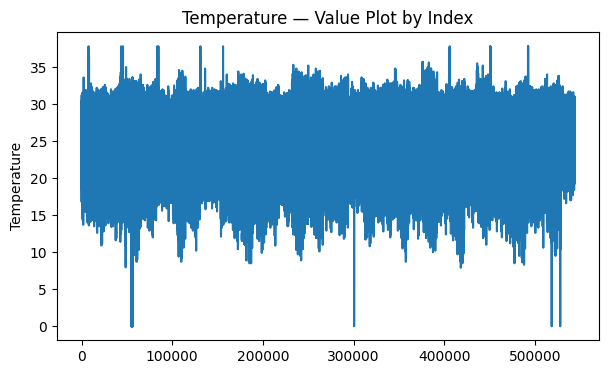

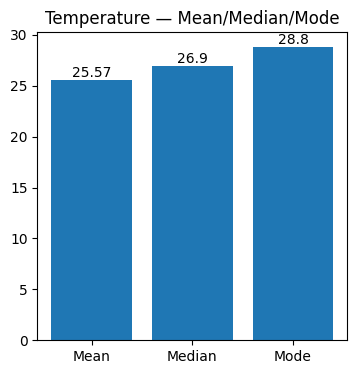

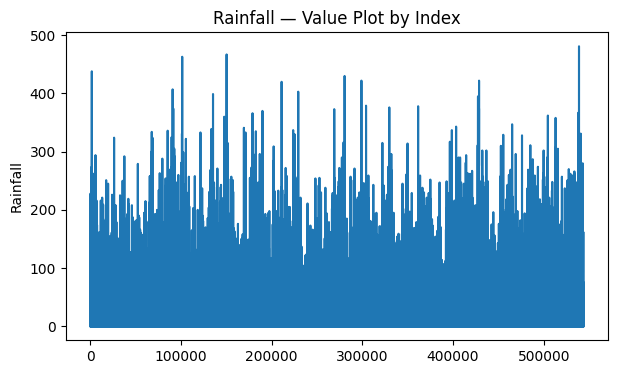

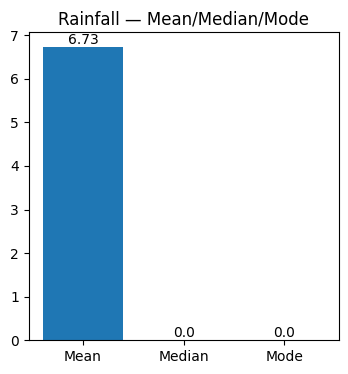

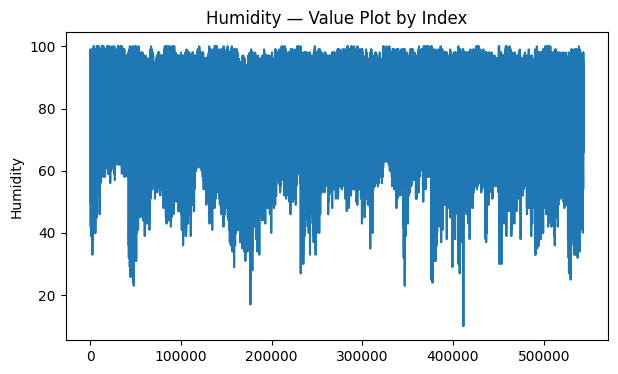

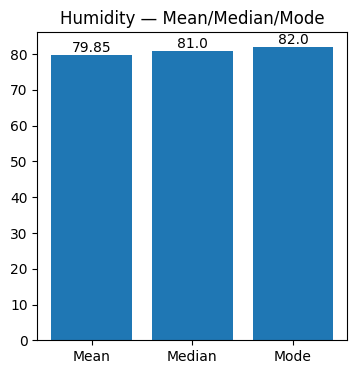

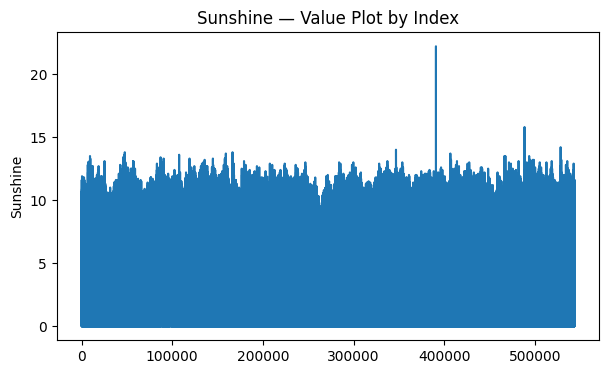

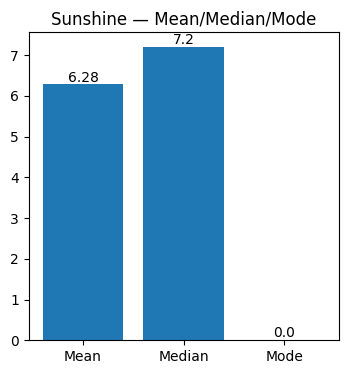


==== STEP-2 : CATEGORICAL CENTRAL TENDENCY ====


-- Categorical Mode --
             Variable  Mode
0      Rain_Category    No
1     Sunshine_Level  High
2  Humidity_Category  High

-- Category Frequency Distribution --
             Variable  Category   Count  Proportion (%)
0      Rain_Category        No  367882           67.65
1      Rain_Category       Yes  175957           32.35
0     Sunshine_Level      High  215904           39.70
1     Sunshine_Level    Medium  183438           33.73
2     Sunshine_Level       Low  144495           26.57
0  Humidity_Category      High  471848           86.76
1  Humidity_Category  Moderate   71938           13.23
2  Humidity_Category       Low      53            0.01


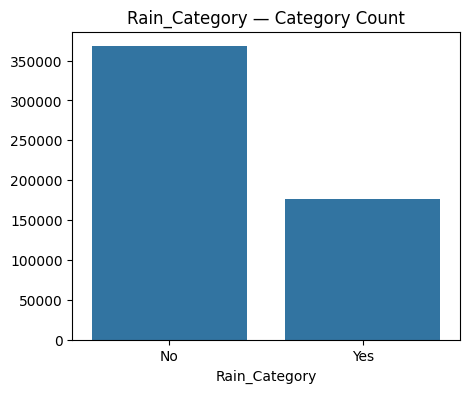

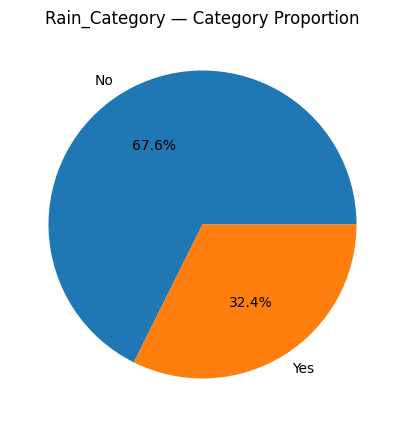

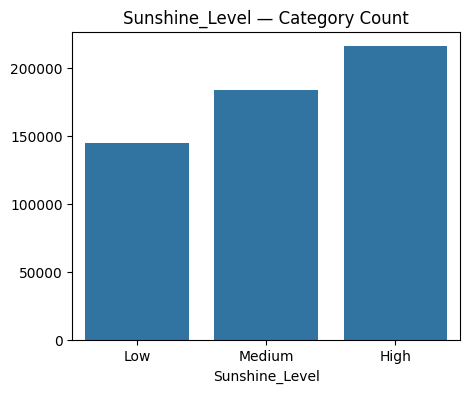

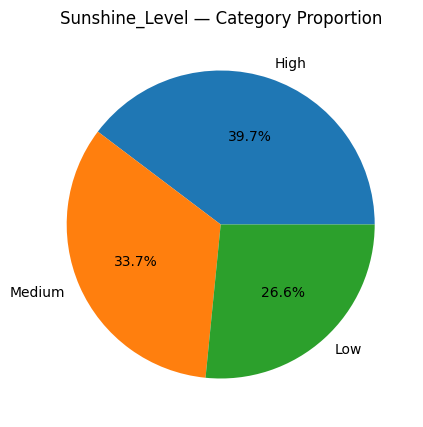

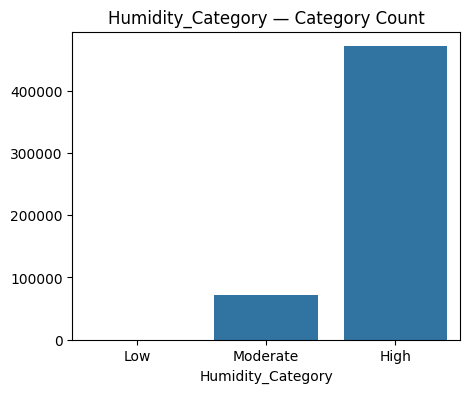

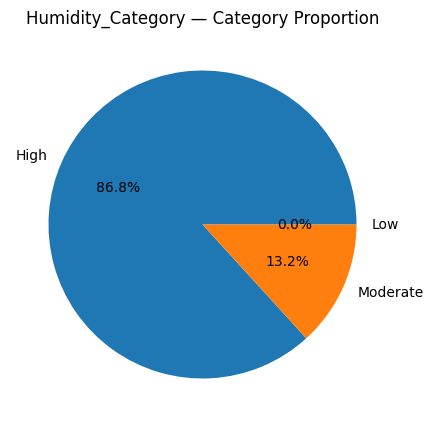


==== STEP-3 : NUMERIC SPREAD ====



AttributeError: 'float' object has no attribute 'round'

In [22]:
# =========================================================
# 📌 TASK-9 : DESCRIPTIVE STATISTICS + VISUALIZATION
# For BD WEATHER DATASET (CWD)  —— Styled like LOAN PROJECT CODE
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------ VARIABLE GROUPING ------------------
num_vars = ["Temperature","Rainfall","Humidity","Sunshine"]
cat_vars = ["Rain_Category","Sunshine_Level","Humidity_Category"]


# ------------------ MODE FUNCTION ------------------
def get_mode(v):
    v = v.dropna()
    return v.mode().iloc[0] if len(v) > 0 else None


# =========================================================
# 🔷 STEP-1 : NUMERIC CENTRAL TENDENCY (Mean / Median / Mode)
# =========================================================
def compute_numeric_ct(df, vars):
    return pd.DataFrame({
        "Variable": vars,
        "Mean":   [round(df[v].mean(),2) for v in vars],
        "Median": [round(df[v].median(),2) for v in vars],
        "Mode":   [round(get_mode(df[v]),2) for v in vars]
    })

print("\n==== STEP-1 : NUMERIC CENTRAL TENDENCY ====\n")
ct_numeric = compute_numeric_ct(CWD, num_vars)
print(ct_numeric)


# ---------- PLOT : VALUE TREND OVER INDEX ----------
def plot_numeric_index(df, var):
    plt.figure(figsize=(7,4))
    sns.lineplot(data=df[var])
    plt.title(f"{var} — Value Plot by Index")
    plt.show()

# ---------- PLOT : MEAN MEDIAN MODE COMPARISON ----------
def plot_numeric_mmm(df, var, label=None):
    m, md, mo = df[var].mean(), df[var].median(), get_mode(df[var])
    stats = pd.DataFrame({"Measure":["Mean","Median","Mode"],"Value":[m,md,mo]})

    plt.figure(figsize=(4,4))
    plt.bar(stats["Measure"],stats["Value"])
    for i,v in enumerate(stats["Value"]):
        plt.text(i,v,round(v,2),ha="center",va="bottom")
    plt.title(f"{label if label else var} — Mean/Median/Mode")
    plt.show()


# 📊 NUMERIC PLOTS (for all num variables)
for v in num_vars:
    plot_numeric_index(CWD,v)
    plot_numeric_mmm(CWD,v,v)


# =========================================================
# 🔷 STEP-2 : CATEGORICAL FREQUENCY + MODE + PIE-BAR GRAPH
# =========================================================
def compute_categorical_ct(df,vars):
    mode_df = pd.DataFrame({"Variable":vars,"Mode":[get_mode(df[v]) for v in vars]})

    freq_list = []
    for v in vars:
        counts = df[v].value_counts()
        freq_list.append(pd.DataFrame({
            "Variable":v,
            "Category":counts.index,
            "Count":counts.values,
            "Proportion (%)":(counts.values/counts.sum()*100).round(2)
        }))
    return mode_df , pd.concat(freq_list)

print("\n==== STEP-2 : CATEGORICAL CENTRAL TENDENCY ====\n")
mode_cat , freq_cat = compute_categorical_ct(CWD,cat_vars)
print("\n-- Categorical Mode --\n",mode_cat)
print("\n-- Category Frequency Distribution --\n",freq_cat)


# ----------- PLOTS FOR CATEGORICAL VARIABLES -----------
def plot_cat_bar(df,var):
    counts=df[var].value_counts()
    plt.figure(figsize=(5,4))
    sns.barplot(x=counts.index,y=counts.values)
    plt.title(f"{var} — Category Count")
    plt.show()

def plot_cat_pie(df,var):
    counts=df[var].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts,labels=counts.index,autopct="%1.1f%%")
    plt.title(f"{var} — Category Proportion")
    plt.show()

for v in cat_vars:
    plot_cat_bar(CWD,v)
    plot_cat_pie(CWD,v)


# =========================================================
# 🔷 STEP-3 : NUMERIC SPREAD (Range / IQR / Variance / SD)
# =========================================================
def compute_numeric_spread(df,vars):
    return pd.DataFrame({
        "Variable":vars,
        "Min":[df[v].min() for v in vars],
        "Max":[df[v].max() for v in vars],
        "Range":[df[v].max()-df[v].min() for v in vars],
        "IQR":[df[v].quantile(.75)-df[v].quantile(.25)for v in vars],
        "Variance":[df[v].var().round(2) for v in vars],
        "Std Dev":[df[v].std().round(2) for v in vars]
    })

print("\n==== STEP-3 : NUMERIC SPREAD ====\n")
spread_numeric=compute_numeric_spread(CWD,num_vars)
print(spread_numeric)
